# 0. Install and Import Dependencies

In [10]:
!pip install neuralprophet

In [7]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

# 1. Read in Data and Process Dates

In [8]:
df = pd.read_csv('Data/hrly_Irish_weather.csv')
df.head()

WARNING - (py.warnings._showwarnmsg) - /var/folders/lj/7nxfhmdd09gchghpg0g2z8vc0000gn/T/ipykernel_14792/3785955756.py:1: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/hrly_Irish_weather.csv')



,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,Galway,ATHENRY,53.289,-8.786,26-jun-2011 01:00,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN
1,Galway,ATHENRY,53.289,-8.786,26-jun-2011 02:00,0.0,14.7,13.7,12.9,14.9,89,1015.8,7,190,NaN,NaN,NaN,NaN
2,Galway,ATHENRY,53.289,-8.786,26-jun-2011 03:00,0.0,14.3,13.4,12.6,14.6,89,1015.5,6,190,NaN,NaN,NaN,NaN
3,Galway,ATHENRY,53.289,-8.786,26-jun-2011 04:00,0.0,14.4,13.6,12.8,14.8,90,1015.3,7,180,NaN,NaN,NaN,NaN
4,Galway,ATHENRY,53.289,-8.786,26-jun-2011 05:00,0.0,14.4,13.5,12.7,14.7,89,1015.1,6,190,NaN,NaN,NaN,NaN


In [14]:
df.station.unique()

array(['ATHENRY', 'BALLYHAISE', 'BELMULLET', 'CASEMENT', 'CLAREMORRIS',
       'CORK AIRPORT', 'DUBLIN AIRPORT', 'DUNSANY', 'FINNER', 'GURTEEN',
       'JOHNSTOWNII', 'KNOCK AIRPORT', 'MACE HEAD', 'MALIN HEAD',
       'MARKREE', 'MOORE PARK', 'MT DILLON', 'MULLINGAR', 'NEWPORT',
       'OAK PARK', 'PHOENIX PARK', 'ROCHES POINT', 'SHANNON AIRPORT',
       'SherkinIsland', 'VALENTIA OBSERVATORY'], dtype=object)

In [15]:
df.columns

Index(['county', 'station', 'latitude', 'longitude', 'date', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'sun', 'vis',
       'clht', 'clamt'],
      dtype='object')

In [16]:
df['rain'].unique()

array(['0.0', '0.8', '0.4', '0.6', '0.2', '6.8', '0.1', '0.7', '1.9',
       '1.4', '0.9', '0.3', '2.4', '6.4', '3.4', '1.6', '1.8', '2.2',
       '1.0', '1.2', '1.3', '0.5', '1.7', '1.1', '2.0', '5.2', '5.6',
       '3.1', '1.5', '3.9', '2.6', '2.8', '3.7', '3.2', '2.3', '2.9',
       '2.5', '3.3', '4.4', '3.5', '5.4', '3.0', '2.1', '3.6', '6.0',
       '5.1', '2.7', '4.3', '9.9', '4.5', nan, '4.1', '3.8', '4.8', '6.3',
       '5.5', '7.0', '5.3', '5.9', '4.2', '7.2', '4.7', '4.9', '9.5',
       '4.6', '4.0', '10.8', '5.0', '8.8', '14.6', '14.2', '6.2', '7.7',
       '9.6', '6.9', '22.7', '6.7', '11.1', '11.2', '5.8', '9.0', '5.7',
       '8.4', '6.1', '7.8', '14.4', '7.5', '11.8', '13.1', '6.5', '8.2',
       '7.3', '6.6', '8.9', '14.7', '10.7', '7.1', '7.4', '8.6', '10.4',
       '8.7', '11.0', '9.4', '7.9', '11.6', '7.6', '10.6', '41.4', '12.8',
       '14.3', '8.5', '12.2', '11.3', '9.7', 0.0, 0.1, 2.8, 0.2, 0.3, 0.5,
       0.4, 1.2, 1.0, 2.3, 0.8, 2.5, 1.6, 1.7, 1.4, 0.9, 0.6, 2

In [11]:
df['rain'] = df['rain'].replace(' ', np.nan)
df['rain'].unique()

array(['0.0', '0.8', '0.4', '0.6', '0.2', '6.8', '0.1', '0.7', '1.9',
       '1.4', '0.9', '0.3', '2.4', '6.4', '3.4', '1.6', '1.8', '2.2',
       '1.0', '1.2', '1.3', '0.5', '1.7', '1.1', '2.0', '5.2', '5.6',
       '3.1', '1.5', '3.9', '2.6', '2.8', '3.7', '3.2', '2.3', '2.9',
       '2.5', '3.3', '4.4', '3.5', '5.4', '3.0', '2.1', '3.6', '6.0',
       '5.1', '2.7', '4.3', '9.9', '4.5', nan, '4.1', '3.8', '4.8', '6.3',
       '5.5', '7.0', '5.3', '5.9', '4.2', '7.2', '4.7', '4.9', '9.5',
       '4.6', '4.0', '10.8', '5.0', '8.8', '14.6', '14.2', '6.2', '7.7',
       '9.6', '6.9', '22.7', '6.7', '11.1', '11.2', '5.8', '9.0', '5.7',
       '8.4', '6.1', '7.8', '14.4', '7.5', '11.8', '13.1', '6.5', '8.2',
       '7.3', '6.6', '8.9', '14.7', '10.7', '7.1', '7.4', '8.6', '10.4',
       '8.7', '11.0', '9.4', '7.9', '11.6', '7.6', '10.6', '41.4', '12.8',
       '14.3', '8.5', '12.2', '11.3', '9.7', 0.0, 0.1, 2.8, 0.2, 0.3, 0.5,
       0.4, 1.2, 1.0, 2.3, 0.8, 2.5, 1.6, 1.7, 1.4, 0.9, 0.6, 2

In [7]:
df.dropna(subset=['rain'], inplace=True)
df['rain'].unique()

array(['0.0', '0.8', '0.4', '0.6', '0.2', '6.8', '0.1', '0.7', '1.9',
       '1.4', '0.9', '0.3', '2.4', '6.4', '3.4', '1.6', '1.8', '2.2',
       '1.0', '1.2', '1.3', '0.5', '1.7', '1.1', '2.0', '5.2', '5.6',
       '3.1', '1.5', '3.9', '2.6', '2.8', '3.7', '3.2', '2.3', '2.9',
       '2.5', '3.3', '4.4', '3.5', '5.4', '3.0', '2.1', '3.6', '6.0',
       '5.1', '2.7', '4.3', '9.9', '4.5', '4.1', '3.8', '4.8', '6.3',
       '5.5', '7.0', '5.3', '5.9', '4.2', '7.2', '4.7', '4.9', '9.5',
       '4.6', '4.0', '10.8', '5.0', '8.8', '14.6', '14.2', '6.2', '7.7',
       '9.6', '6.9', '22.7', '6.7', '11.1', '11.2', '5.8', '9.0', '5.7',
       '8.4', '6.1', '7.8', '14.4', '7.5', '11.8', '13.1', '6.5', '8.2',
       '7.3', '6.6', '8.9', '14.7', '10.7', '7.1', '7.4', '8.6', '10.4',
       '8.7', '11.0', '9.4', '7.9', '11.6', '7.6', '10.6', '41.4', '12.8',
       '14.3', '8.5', '12.2', '11.3', '9.7', 0.0, 0.1, 2.8, 0.2, 0.3, 0.5,
       0.4, 1.2, 1.0, 2.3, 0.8, 2.5, 1.6, 1.7, 1.4, 0.9, 0.6, 2.1, 0

In [17]:
df.dtypes

county        object
station       object
latitude     float64
longitude    float64
date          object
rain          object
temp          object
wetb          object
dewpt         object
vappr         object
rhum          object
msl           object
wdsp          object
wddir         object
sun           object
vis           object
clht          object
clamt         object
dtype: object

In [18]:
val_obs = df[df['station'] == 'VALENTIA OBSERVATORY']
val_obs['date'] = pd.to_datetime(val_obs['date'])
val_obs.head()

WARNING - (py.warnings._showwarnmsg) - /var/folders/lj/7nxfhmdd09gchghpg0g2z8vc0000gn/T/ipykernel_14792/167905292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_obs['date'] = pd.to_datetime(val_obs['date'])



,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
4393807,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 00:00:00,0.0,7.6,6.8,5.8,9.2,89,1005.3,8,200,0.0,20000.0,35.0,5.0
4393808,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 01:00:00,0.0,8.0,6.5,4.6,8.5,79,1005.5,10,200,0.0,20000.0,35.0,6.0
4393809,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 02:00:00,0.0,7.1,6.1,4.8,8.6,85,1005.8,8,210,0.0,20000.0,999.0,4.0
4393810,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 03:00:00,0.0,7.4,6.0,4.1,8.2,80,1006.2,8,190,0.0,20000.0,999.0,1.0
4393811,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 04:00:00,0.2,6.9,6.0,4.8,8.6,87,1006.1,8,180,0.0,30000.0,999.0,1.0


In [19]:
val_obs['rain'] = pd.to_numeric(val_obs['rain'], errors='coerce')
val_obs.head()

WARNING - (py.warnings._showwarnmsg) - /var/folders/lj/7nxfhmdd09gchghpg0g2z8vc0000gn/T/ipykernel_14792/479857016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_obs['rain'] = pd.to_numeric(val_obs['rain'], errors='coerce')



,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
4393807,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 00:00:00,0.0,7.6,6.8,5.8,9.2,89,1005.3,8,200,0.0,20000.0,35.0,5.0
4393808,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 01:00:00,0.0,8.0,6.5,4.6,8.5,79,1005.5,10,200,0.0,20000.0,35.0,6.0
4393809,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 02:00:00,0.0,7.1,6.1,4.8,8.6,85,1005.8,8,210,0.0,20000.0,999.0,4.0
4393810,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 03:00:00,0.0,7.4,6.0,4.1,8.2,80,1006.2,8,190,0.0,20000.0,999.0,1.0
4393811,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1990-01-01 04:00:00,0.2,6.9,6.0,4.8,8.6,87,1006.1,8,180,0.0,30000.0,999.0,1.0


In [26]:
val_obs.dtypes

county               object
station              object
latitude            float64
longitude           float64
date         datetime64[ns]
rain                float64
temp                 object
wetb                 object
dewpt                object
vappr                object
rhum                 object
msl                  object
wdsp                 object
wddir                object
sun                  object
vis                  object
clht                 object
clamt                object
dtype: object

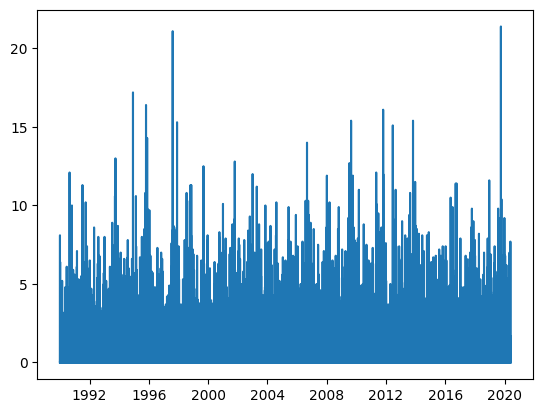

In [27]:
plt.plot(val_obs['date'], val_obs['rain'])
plt.show()

In [28]:
val_obs_2019_2020 = val_obs[(val_obs['date'].dt.year >= 2019) & (val_obs['date'].dt.year <= 2020)]
val_obs_2019_2020.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
4648014,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-01-01 00:00:00,0.0,9.8,8.2,6.4,9.6,79,1036.7,3,190,,,,
4648015,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-01-01 01:00:00,0.0,10.1,8.0,5.7,9.1,74,1036.7,3,170,,,,
4648016,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-01-01 02:00:00,0.0,9.8,7.8,5.5,9.0,74,1036.8,3,170,,,,
4648017,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-01-01 03:00:00,0.0,9.8,7.8,5.3,8.9,73,1036.7,2,150,,,,
4648018,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-01-01 04:00:00,0.0,9.4,7.8,5.9,9.3,78,1036.9,2,210,,,,


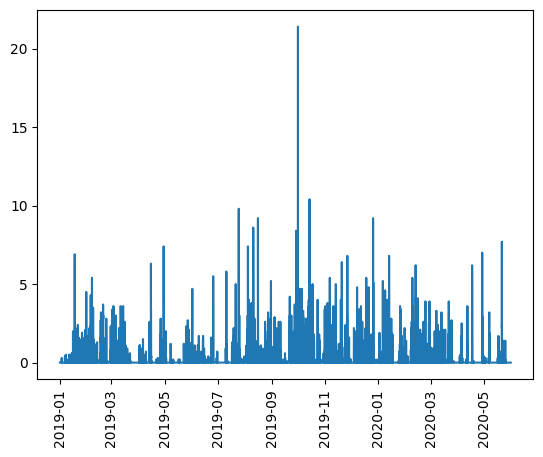

In [29]:
# Plot the data
plt.plot(val_obs_2019_2020['date'], val_obs_2019_2020['rain'])

# Rotate the date labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [30]:
val_obs_sep_nov_2019 = val_obs[val_obs['date'].between('2019-09-01', '2019-11-30')]
val_obs_sep_nov_2019.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
4653846,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-01 00:00:00,0.0,13.3,10.6,7.9,10.7,70,1019.4,9,320,,,,
4653847,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-01 01:00:00,0.2,12.2,10.4,8.5,11.1,78,1019.8,8,320,,,,
4653848,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-01 02:00:00,0.0,13.1,10.4,7.7,10.5,69,1020.1,8,320,,,,
4653849,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-01 03:00:00,0.0,12.8,9.9,6.8,9.9,66,1020.1,8,320,,,,
4653850,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-01 04:00:00,0.0,12.5,9.8,7.0,10.0,68,1020.3,7,320,,,,


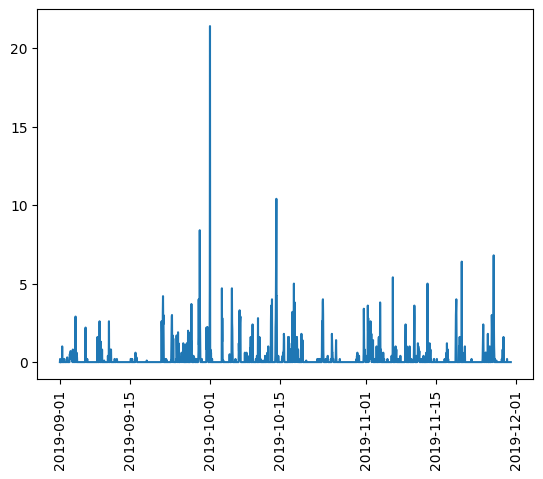

In [31]:
# Plot the data
plt.plot(val_obs_sep_nov_2019['date'], val_obs_sep_nov_2019['rain'])

# Rotate the date labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [32]:
val_obs_sep_29_oct_2_2019 = val_obs[(val_obs['date'] >= pd.to_datetime('2019-09-29')) & (val_obs['date'] <= pd.to_datetime('2019-10-02'))]
val_obs_sep_29_oct_2_2019.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
4654518,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-29 00:00:00,1.2,12.7,11.8,10.9,13.0,88,991.6,12,30,,,,
4654519,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-29 01:00:00,0.2,12.7,11.7,10.7,12.9,87,992.6,15,30,,,,
4654520,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-29 02:00:00,0.0,12.5,11.5,10.6,12.8,88,994.1,14,30,,,,
4654521,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-29 03:00:00,0.0,13.1,11.5,10.0,12.3,81,995.1,16,20,,,,
4654522,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-29 04:00:00,0.0,13.4,11.8,10.3,12.6,81,996.1,12,10,,,,


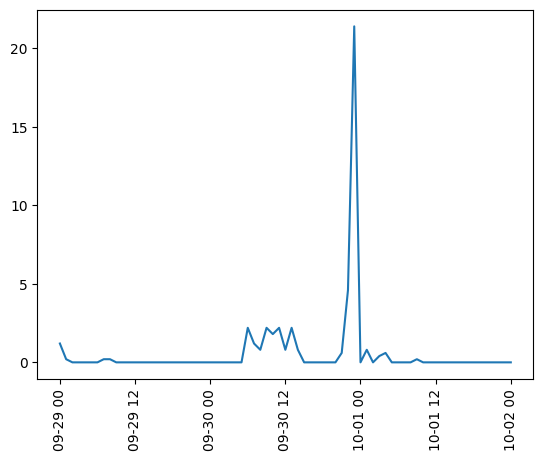

In [33]:
# Plot the data
plt.plot(val_obs_sep_29_oct_2_2019['date'], val_obs_sep_29_oct_2_2019['rain'])

# Rotate the date labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [34]:
mask = ((val_obs['date'] >= '2019-09-30 19:00:00') & (val_obs['date'] < '2019-10-01 03:00:00'))
val_obs_late_night = val_obs[mask]
val_obs_late_night.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
4654561,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-30 19:00:00,0.0,14.9,14.4,14.1,16.0,94,996.0,8,190,,,,
4654562,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-30 20:00:00,0.0,15.1,14.6,14.2,16.2,94,995.8,8,200,,,,
4654563,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-30 21:00:00,0.6,14.8,14.3,14.0,15.9,95,995.6,9,190,,,,
4654564,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-30 22:00:00,4.6,14.6,14.3,14.0,16.0,96,994.9,5,180,,,,
4654565,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,2019-09-30 23:00:00,21.4,12.9,12.2,11.6,13.6,91,994.0,5,120,,,,


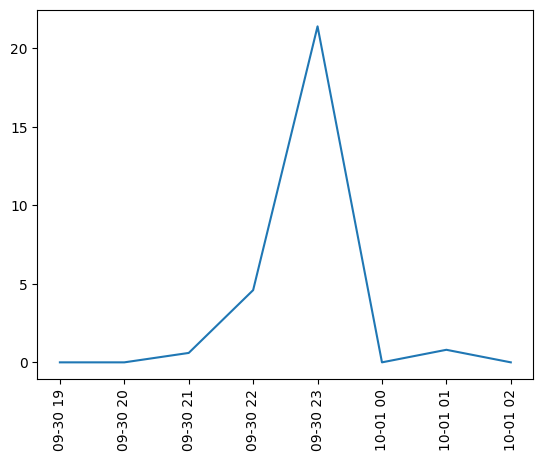

In [35]:
# Plot the data
plt.plot(val_obs_late_night['date'], val_obs_late_night['rain'])

# Rotate the date labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [36]:
data = val_obs[['date', 'rain']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - /var/folders/lj/7nxfhmdd09gchghpg0g2z8vc0000gn/T/ipykernel_14792/374411250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
4393807,1990-01-01 00:00:00,0.0
4393808,1990-01-01 01:00:00,0.0
4393809,1990-01-01 02:00:00,0.0
4393810,1990-01-01 03:00:00,0.0
4393811,1990-01-01 04:00:00,0.2


# 2. Train Model

In [37]:
m = NeuralProphet()
m.fit(data, freq = 'H', epochs=20)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128


Finding best initial lr:   0%|          | 0/285 [00:00<?, ?it/s]

2023-04-12 16:59:05.743674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,0.658668,0.968941,0.234520,0.0,0
1,0.250921,0.607713,0.070852,0.0,1
2,0.252335,0.609297,0.071507,0.0,2
3,0.256160,0.611669,0.072326,0.0,3
4,0.260406,0.613529,0.073050,0.0,4
5,0.263028,0.615970,0.073510,0.0,5
6,0.262604,0.615492,0.073397,0.0,6
7,0.261955,0.614780,0.073286,0.0,7
8,0.261333,0.614425,0.073162,0.0,8
9,0.260066,0.614812,0.072981,0.0,9


# 3. Forecast Away

In [38]:
future = m.make_future_dataframe(data, periods=21600)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 2083it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2020-06-01 01:00:00,None,0.106709,0.131236,-0.033757,-0.000033,0.009262
1,2020-06-01 02:00:00,None,0.104472,0.131236,-0.033767,0.000002,0.007001
2,2020-06-01 03:00:00,None,0.107066,0.131236,-0.033776,0.000052,0.009554
3,2020-06-01 04:00:00,None,0.113898,0.131236,-0.033785,0.000120,0.016327
4,2020-06-01 05:00:00,None,0.117315,0.131236,-0.033794,0.000209,0.019664


In [42]:
future

,ds,y
0,2020-06-01 01:00:00,None
1,2020-06-01 02:00:00,None
2,2020-06-01 03:00:00,None
3,2020-06-01 04:00:00,None
4,2020-06-01 05:00:00,None
...,...,...
21595,2022-11-17 20:00:00,None
21596,2022-11-17 21:00:00,None
21597,2022-11-17 22:00:00,None
21598,2022-11-17 23:00:00,None


In [43]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
21595,2022-11-17 20:00:00,None,0.173324,0.131936,0.044233,0.000181,-0.003026
21596,2022-11-17 21:00:00,None,0.171396,0.131936,0.044222,0.000677,-0.005440
21597,2022-11-17 22:00:00,None,0.172033,0.131936,0.044211,0.001135,-0.005249
21598,2022-11-17 23:00:00,None,0.178935,0.131936,0.044201,0.001550,0.001248
21599,2022-11-18 00:00:00,None,0.186440,0.131936,0.044190,0.001918,0.008396


In [44]:
# This code will work for some but not for all
# plot1 = m.plot(forecast)

In [41]:
# Same here
# plot2 = m.plot_components(forecast)

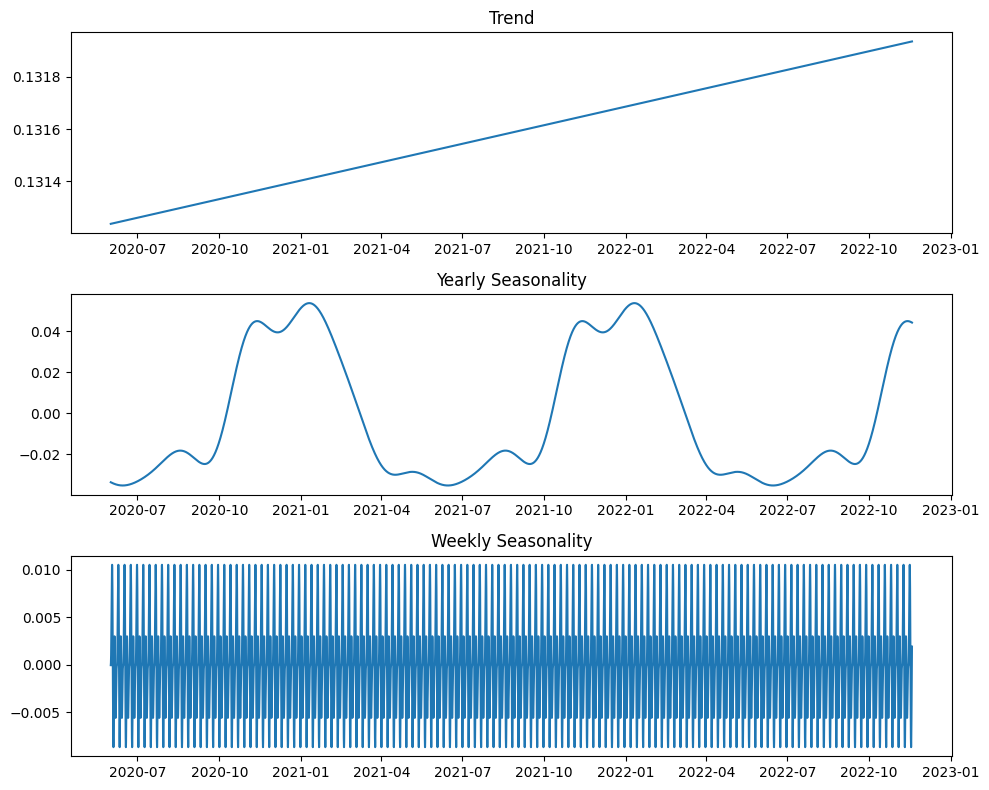

In [46]:
# This code does the same as plot2 = m.plot_components(forecast) 
fig, axs = plt.subplots(nrows=3, figsize=(10,8))

axs[0].plot(forecast['ds'], forecast['trend'])
axs[0].set(title='Trend')

axs[1].plot(forecast['ds'], forecast['season_yearly'])
axs[1].set(title='Yearly Seasonality')

axs[2].plot(forecast['ds'], forecast['season_weekly'])
axs[2].set(title='Weekly Seasonality')

plt.tight_layout()
plt.show()

# 4. Save Model

In [49]:
with open('rain_forecast_model.pkl', 'wb') as f:
    pickle.dump(m, f)

OSError: [Errno 28] No space left on device